<a href="https://colab.research.google.com/github/kingap1234/AI-finanse/blob/main/UseCase1_FRAUD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# USE CASE 1 - FRAUD
Kinga Pijaczyńska, 75698

Biblioteki:

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

Wczytanie danych

In [39]:
df = pd.read_csv('/content/case1 (1).csv', sep=';', index_col = [0])

In [40]:
df.head()

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [41]:
print(df.shape[0], df.shape[1])

9841 50


Zbiór danych zawiera 9841 wierszy oraz 50 kolumn

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9841 entries, 0 to 9840
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Index                                                 9841 non-null   int64  
 1   Address                                               9841 non-null   object 
 2   FLAG                                                  9841 non-null   int64  
 3   Avg min between sent tnx                              9841 non-null   float64
 4   Avg min between received tnx                          9841 non-null   float64
 5   Time Diff between first and last (Mins)               9841 non-null   float64
 6   Sent tnx                                              9841 non-null   int64  
 7   Received Tnx                                          9841 non-null   int64  
 8   Number of Created Contracts                           9841 non-

In [43]:
df['FLAG'].value_counts()

FLAG
0    7662
1    2179
Name: count, dtype: int64

Usunięcie trzech zmiennych obiektowych oraz kolumny index

In [44]:
df_cleaned = df.drop(columns=['Address','Index', 'ERC20_most_rec_token_type', 'ERC20 most sent token type'])

In [45]:
df_cleaned.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


Sprawdzenie braków danych

In [46]:
df_cleaned.isnull().sum()

FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract                                0
max val sent to contract                

In [47]:
missing_num = ['Total ERC20 tnxs',
 'ERC20 total Ether received',
 'ERC20 total ether sent',
 'ERC20 total Ether sent contract',
 'ERC20 uniq sent addr',
 'ERC20 uniq rec addr',
 'ERC20 uniq sent addr.1',
 'ERC20 uniq rec contract addr',
 'ERC20 avg time between sent tnx',
 'ERC20 avg time between rec tnx',
 'ERC20 avg time between rec 2 tnx',
 'ERC20 avg time between contract tnx',
 'ERC20 min val rec',
 'ERC20 max val rec',
 'ERC20 avg val rec',
 'ERC20 min val sent',
 'ERC20 max val sent',
 'ERC20 avg val sent',
 'ERC20 min val sent contract',
 'ERC20 max val sent contract',
 'ERC20 avg val sent contract',
 'ERC20 uniq sent token name',
 'ERC20 uniq rec token name']


Zastąpienie braków danych średnią arytmetyczną

In [48]:
imputer = SimpleImputer(strategy = 'mean')
imputer.fit(df_cleaned[missing_num])

print(missing_num,imputer.statistics_)

['Total ERC20 tnxs', 'ERC20 total Ether received', 'ERC20 total ether sent', 'ERC20 total Ether sent contract', 'ERC20 uniq sent addr', 'ERC20 uniq rec addr', 'ERC20 uniq sent addr.1', 'ERC20 uniq rec contract addr', 'ERC20 avg time between sent tnx', 'ERC20 avg time between rec tnx', 'ERC20 avg time between rec 2 tnx', 'ERC20 avg time between contract tnx', 'ERC20 min val rec', 'ERC20 max val rec', 'ERC20 avg val rec', 'ERC20 min val sent', 'ERC20 max val sent', 'ERC20 avg val sent', 'ERC20 min val sent contract', 'ERC20 max val sent contract', 'ERC20 avg val sent contract', 'ERC20 uniq sent token name', 'ERC20 uniq rec token name'] [3.62556591e+01 1.29620673e+08 1.38684926e+07 1.10939207e+02
 5.63803817e+00 7.59853529e+00 3.43985797e-03 4.90190857e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.85614688e+02 1.25252360e+08 4.34620307e+06 1.17412573e+04
 1.30359352e+07 6.31838913e+06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.38493120e+00 4.82667554e+00]


In [49]:
df_cleaned[missing_num] = imputer.transform(df_cleaned[missing_num])

In [50]:
df_cleaned.isnull().sum()

FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent to contract                                0
avg value sent

Usunięcie zmiennych z wariancją równą 0

In [51]:
variances = df_cleaned.var()

var0 = variances[variances == 0].index

print(var0)

Index(['ERC20 avg time between sent tnx', 'ERC20 avg time between rec tnx',
       'ERC20 avg time between rec 2 tnx',
       'ERC20 avg time between contract tnx', 'ERC20 min val sent contract',
       'ERC20 max val sent contract', 'ERC20 avg val sent contract'],
      dtype='object')


In [52]:
df_cleaned = df_cleaned.drop(columns=['ERC20 avg time between sent tnx', 'ERC20 avg time between rec tnx',
       'ERC20 avg time between rec 2 tnx',
       'ERC20 avg time between contract tnx', 'ERC20 min val sent contract',
       'ERC20 max val sent contract', 'ERC20 avg val sent contract'])

Standaryzacja danych

In [53]:
scaler = StandardScaler()
col_num = ['Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'max val sent', 'avg val sent',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received', 'Total ERC20 tnxs',
       'ERC20 total ether sent', 'ERC20 total Ether sent contract',
       'ERC20 uniq sent addr', 'ERC20 uniq rec addr',
       'ERC20 uniq rec contract addr', 'ERC20 min val sent',
       'ERC20 max val sent', 'ERC20 avg val sent',
       'ERC20 uniq rec token name']

In [54]:
for column in df_cleaned[col_num]:
  df_cleaned[column] = scaler.fit_transform(df_cleaned[[column]])

In [55]:
df_cleaned.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,-0.197465,-0.299436,1.506411,0.799099,-0.079402,-0.02637,0.032280,0.349346,-0.134530,...,0.0,3.217430,0.0,1.500000e+07,265586.147600,-0.011646,0.003361,-0.010683,39.0,3.269052
1,0,0.354760,-0.218644,3.096367,-0.028965,-0.165500,-0.02637,-0.084931,-0.044882,-0.134530,...,0.0,0.127132,0.0,3.650000e+02,57.632615,-0.011644,-0.011546,-0.011164,1.0,0.136175
2,0,11.221900,-0.241365,0.924051,-0.150467,-0.163375,-0.02637,-0.068187,-0.090370,-0.134183,...,0.0,0.187726,0.0,4.428198e+02,65.189009,-0.011646,-0.011546,-0.011164,0.0,0.198833
3,0,0.238893,0.337091,0.555004,-0.120091,-0.164437,-0.02637,-0.078233,-0.048673,-0.134530,...,0.0,0.369508,0.0,1.141223e+04,1555.550174,-0.011547,-0.011538,-0.011157,1.0,0.386805
4,0,-0.235055,0.117108,0.508294,5.919361,-0.152745,-0.01930,-0.078233,-0.025929,-0.134530,...,0.0,1.339014,0.0,9.000000e+04,4934.232147,-0.011646,-0.011506,-0.011139,6.0,1.389326


In [56]:
df_cleaned.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03,9841.000000,9.841000e+03,...,9841.00000,9.841000e+03,9841.000000,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03,9841.000000,9.841000e+03
mean,0.221421,2.599282e-17,-1.155237e-17,-3.465710e-17,1.155237e-17,-1.444046e-17,-1.444046e-18,-2.888092e-18,0.000000,7.220229e-18,...,0.00344,2.888092e-17,485.614688,1.252524e+08,4.346203e+06,1.444046e-18,2.888092e-18,5.776183e-18,1.384931,5.054160e-17
std,0.415224,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051,1.000051e+00,...,0.06287,1.000051e+00,16156.442360,1.008377e+10,2.049013e+08,1.000051e+00,1.000051e+00,1.000051e+00,6.445170,1.000051e+00
min,0.000000,-2.367591e-01,-3.468225e-01,-6.761186e-01,-1.531083e-01,-1.740039e-01,-2.636980e-02,-1.016756e-01,-0.097951,-1.345304e-01,...,0.00000,-2.970267e-01,0.000000,0.000000e+00,0.000000e+00,-1.164623e-02,-1.154591e-02,-1.116354e-02,0.000000,-3.024276e-01
25%,0.000000,-2.367591e-01,-3.468225e-01,-6.751372e-01,-1.517876e-01,-1.729410e-01,-2.636980e-02,-9.832671e-02,-0.094160,-1.345273e-01,...,0.00000,-2.970267e-01,0.000000,0.000000e+00,0.000000e+00,-1.164623e-02,-1.154591e-02,-1.116354e-02,0.000000,-3.024276e-01
50%,0.000000,-2.359521e-01,-3.247359e-01,-5.316965e-01,-1.491462e-01,-1.697522e-01,-2.636980e-02,-9.497781e-02,-0.090370,-1.342363e-01,...,0.00000,-2.364326e-01,0.000000,5.356400e-01,4.332520e-01,-1.164623e-02,-1.154591e-02,-1.116354e-02,0.000000,-2.397701e-01
75%,0.000000,-2.104404e-01,-1.093762e-01,2.655064e-01,-1.385808e-01,-1.453046e-01,-2.636980e-02,-8.493113e-02,-0.086579,-1.283938e-01,...,0.00000,-5.465033e-02,0.519421,6.000000e+02,1.480957e+02,-1.164623e-02,-1.154591e-02,-1.116354e-02,0.000000,-5.179746e-02
max,1.000000,1.979017e+01,2.054417e+01,5.377553e+00,1.305365e+01,1.045537e+01,7.064044e+01,3.338393e+01,35.105815,3.054854e+01,...,3.00000,4.708755e+01,990000.000000,1.000000e+12,1.724181e+10,9.917904e+01,9.918671e+01,9.919224e+01,213.000000,4.587618e+01


Redukcja wymiarowości - sprawdzenie korelacji zmiennych

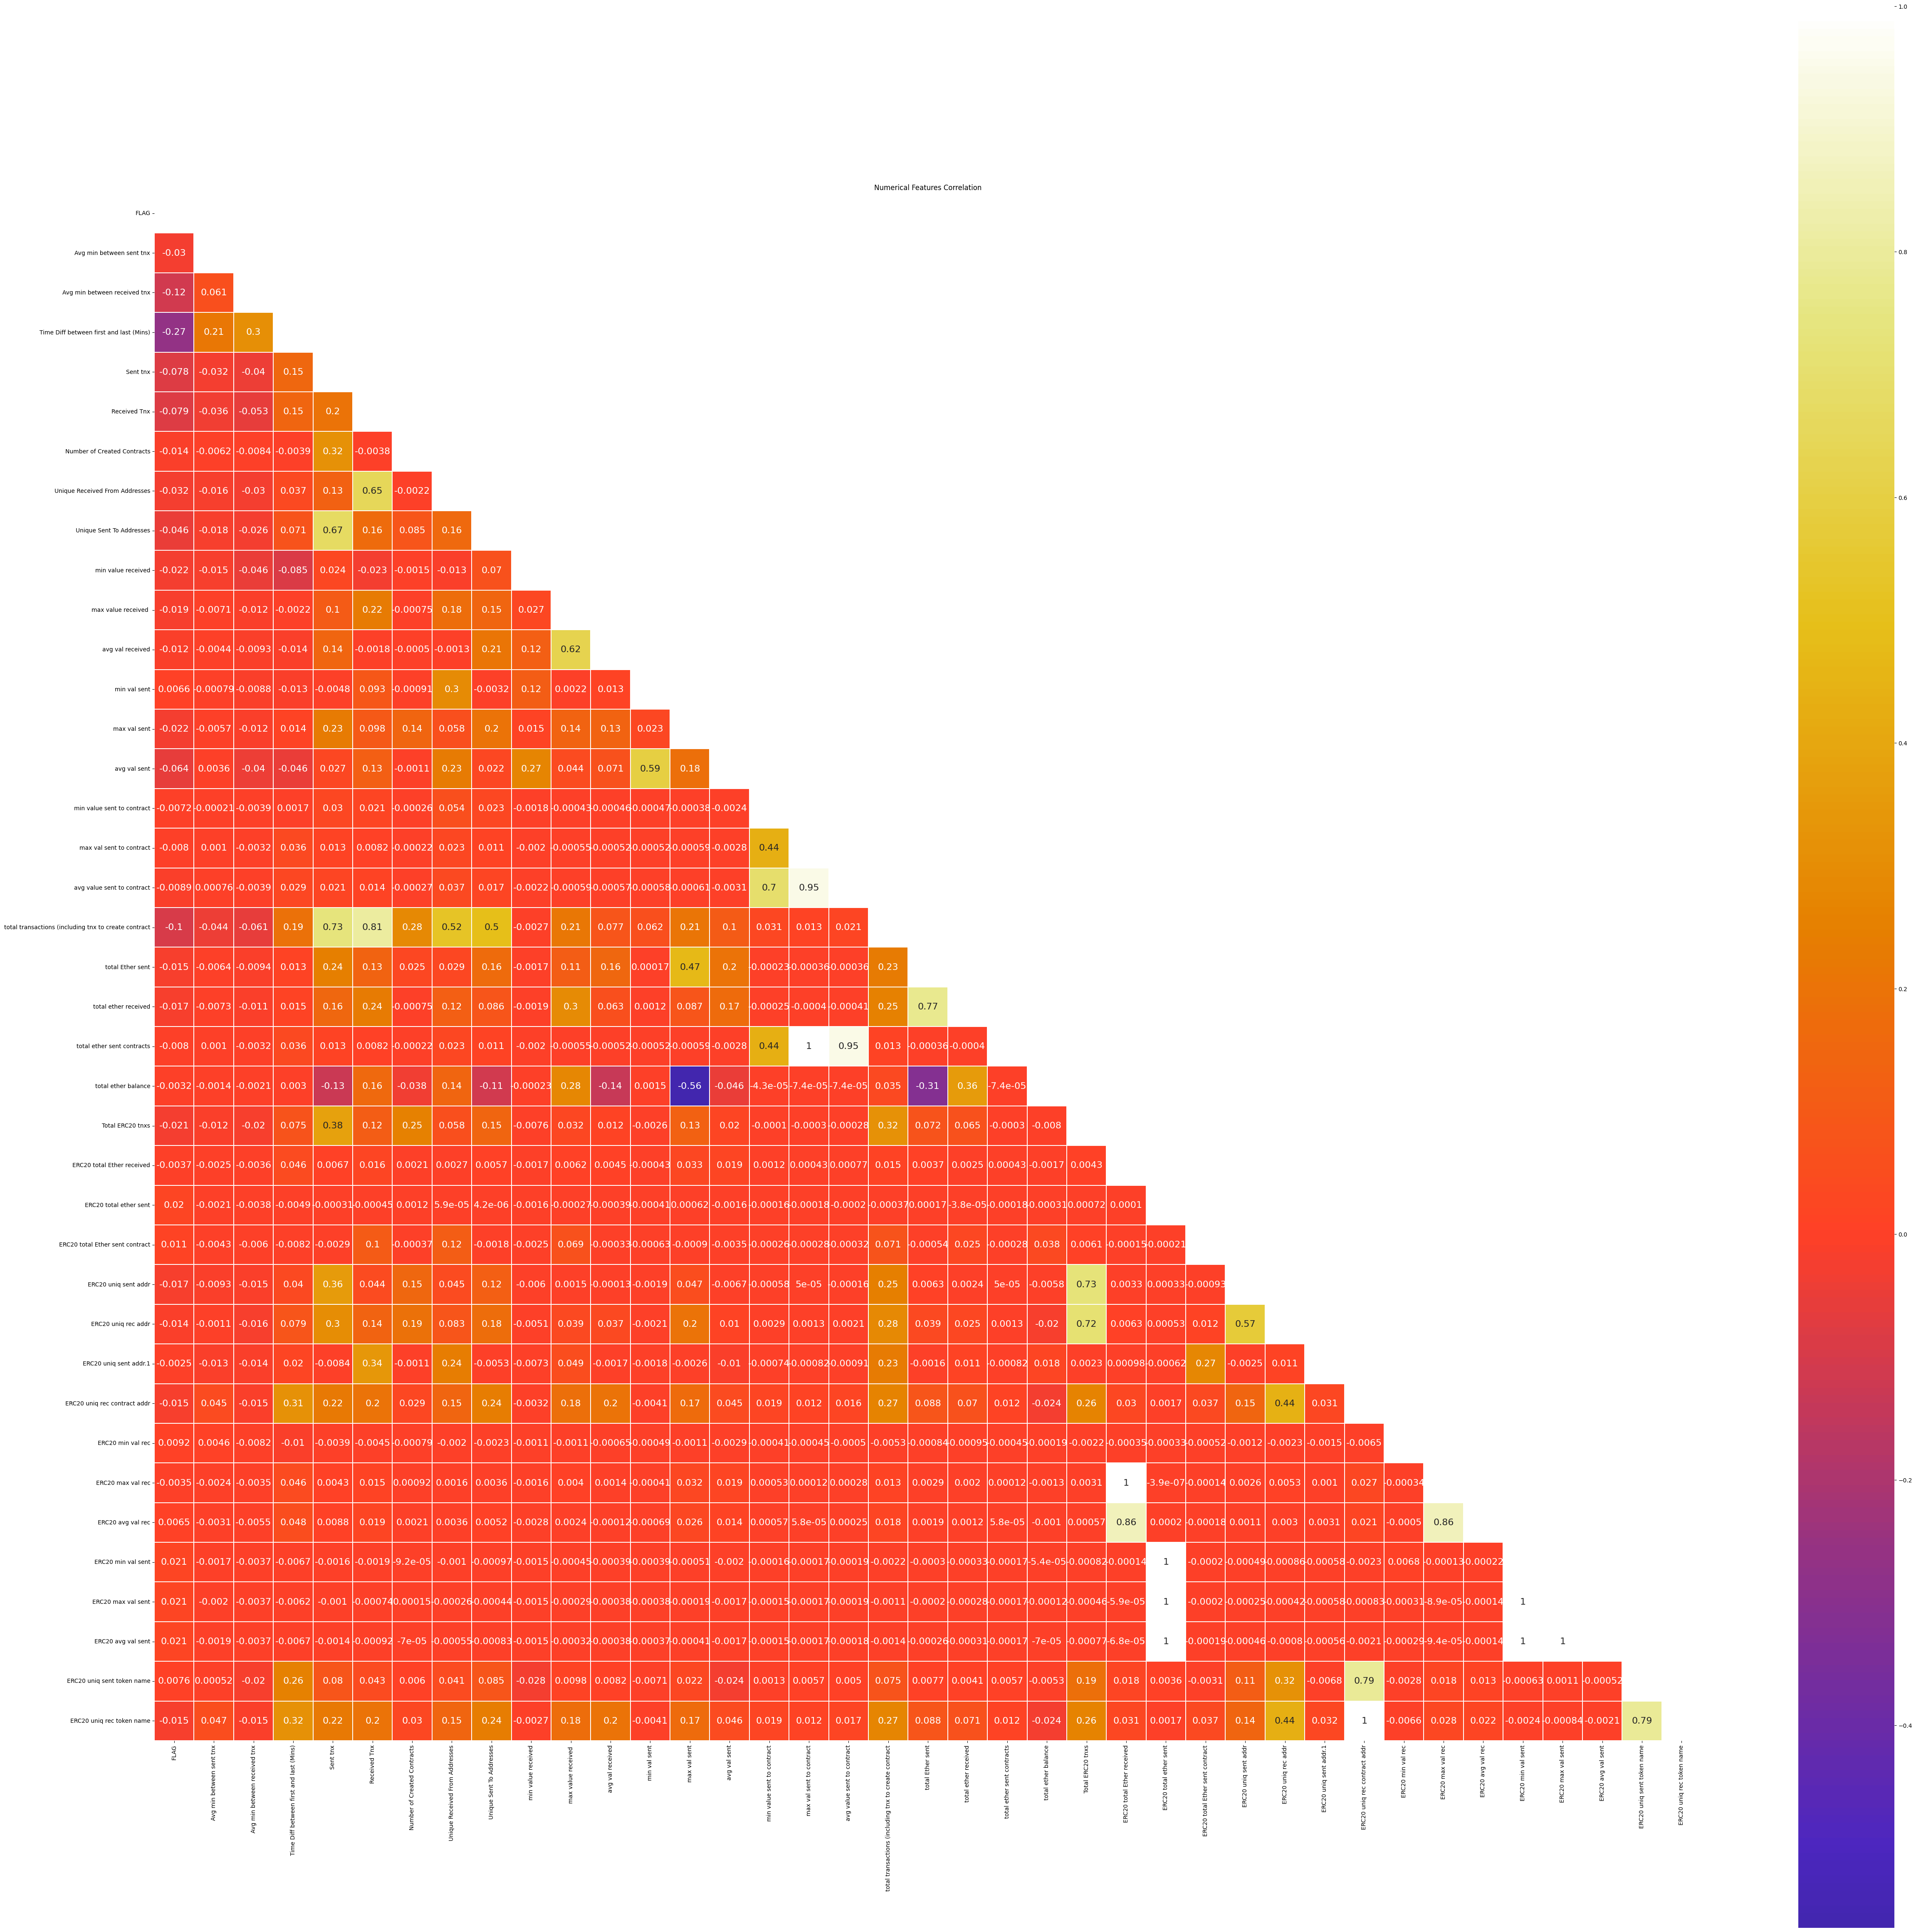

In [57]:
correlation = df_cleaned.corr()

mask = np.triu(np.ones_like(correlation, dtype=bool))

plt.figure(figsize=(60, 60))
sns.heatmap(correlation, mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True, annot_kws={"size": 16})
plt.title('Numerical Features Correlation')
plt.show()

In [58]:
correlation["FLAG"].sort_values(ascending = False)

FLAG                                                    1.000000
ERC20 min val sent                                      0.020863
ERC20 avg val sent                                      0.020599
ERC20 max val sent                                      0.020594
ERC20 total ether sent                                  0.020367
ERC20 total Ether sent contract                         0.011115
ERC20 min val rec                                       0.009182
ERC20 uniq sent token name                              0.007608
min val sent                                            0.006626
ERC20 avg val rec                                       0.006483
ERC20 uniq sent addr.1                                 -0.002506
total ether balance                                    -0.003229
ERC20 max val rec                                      -0.003548
ERC20 total Ether received                             -0.003681
min value sent to contract                             -0.007213
max val sent to contract 

Usuwam zmienne, które mają wartości korelacji bliskie zeru lub niewielkie wartości korelacji względem zmiennej FLAG.

In [59]:
df_cleaned = df_cleaned.drop(columns = ['ERC20 min val rec','ERC20 uniq sent token name','min val sent','ERC20 avg val rec',
'total ether balance', 'ERC20 max val rec', 'ERC20 total Ether received','min value sent to contract', 'max val sent to contract',
'total ether sent contracts', 'avg value sent to contract', 'ERC20 uniq sent addr.1'])

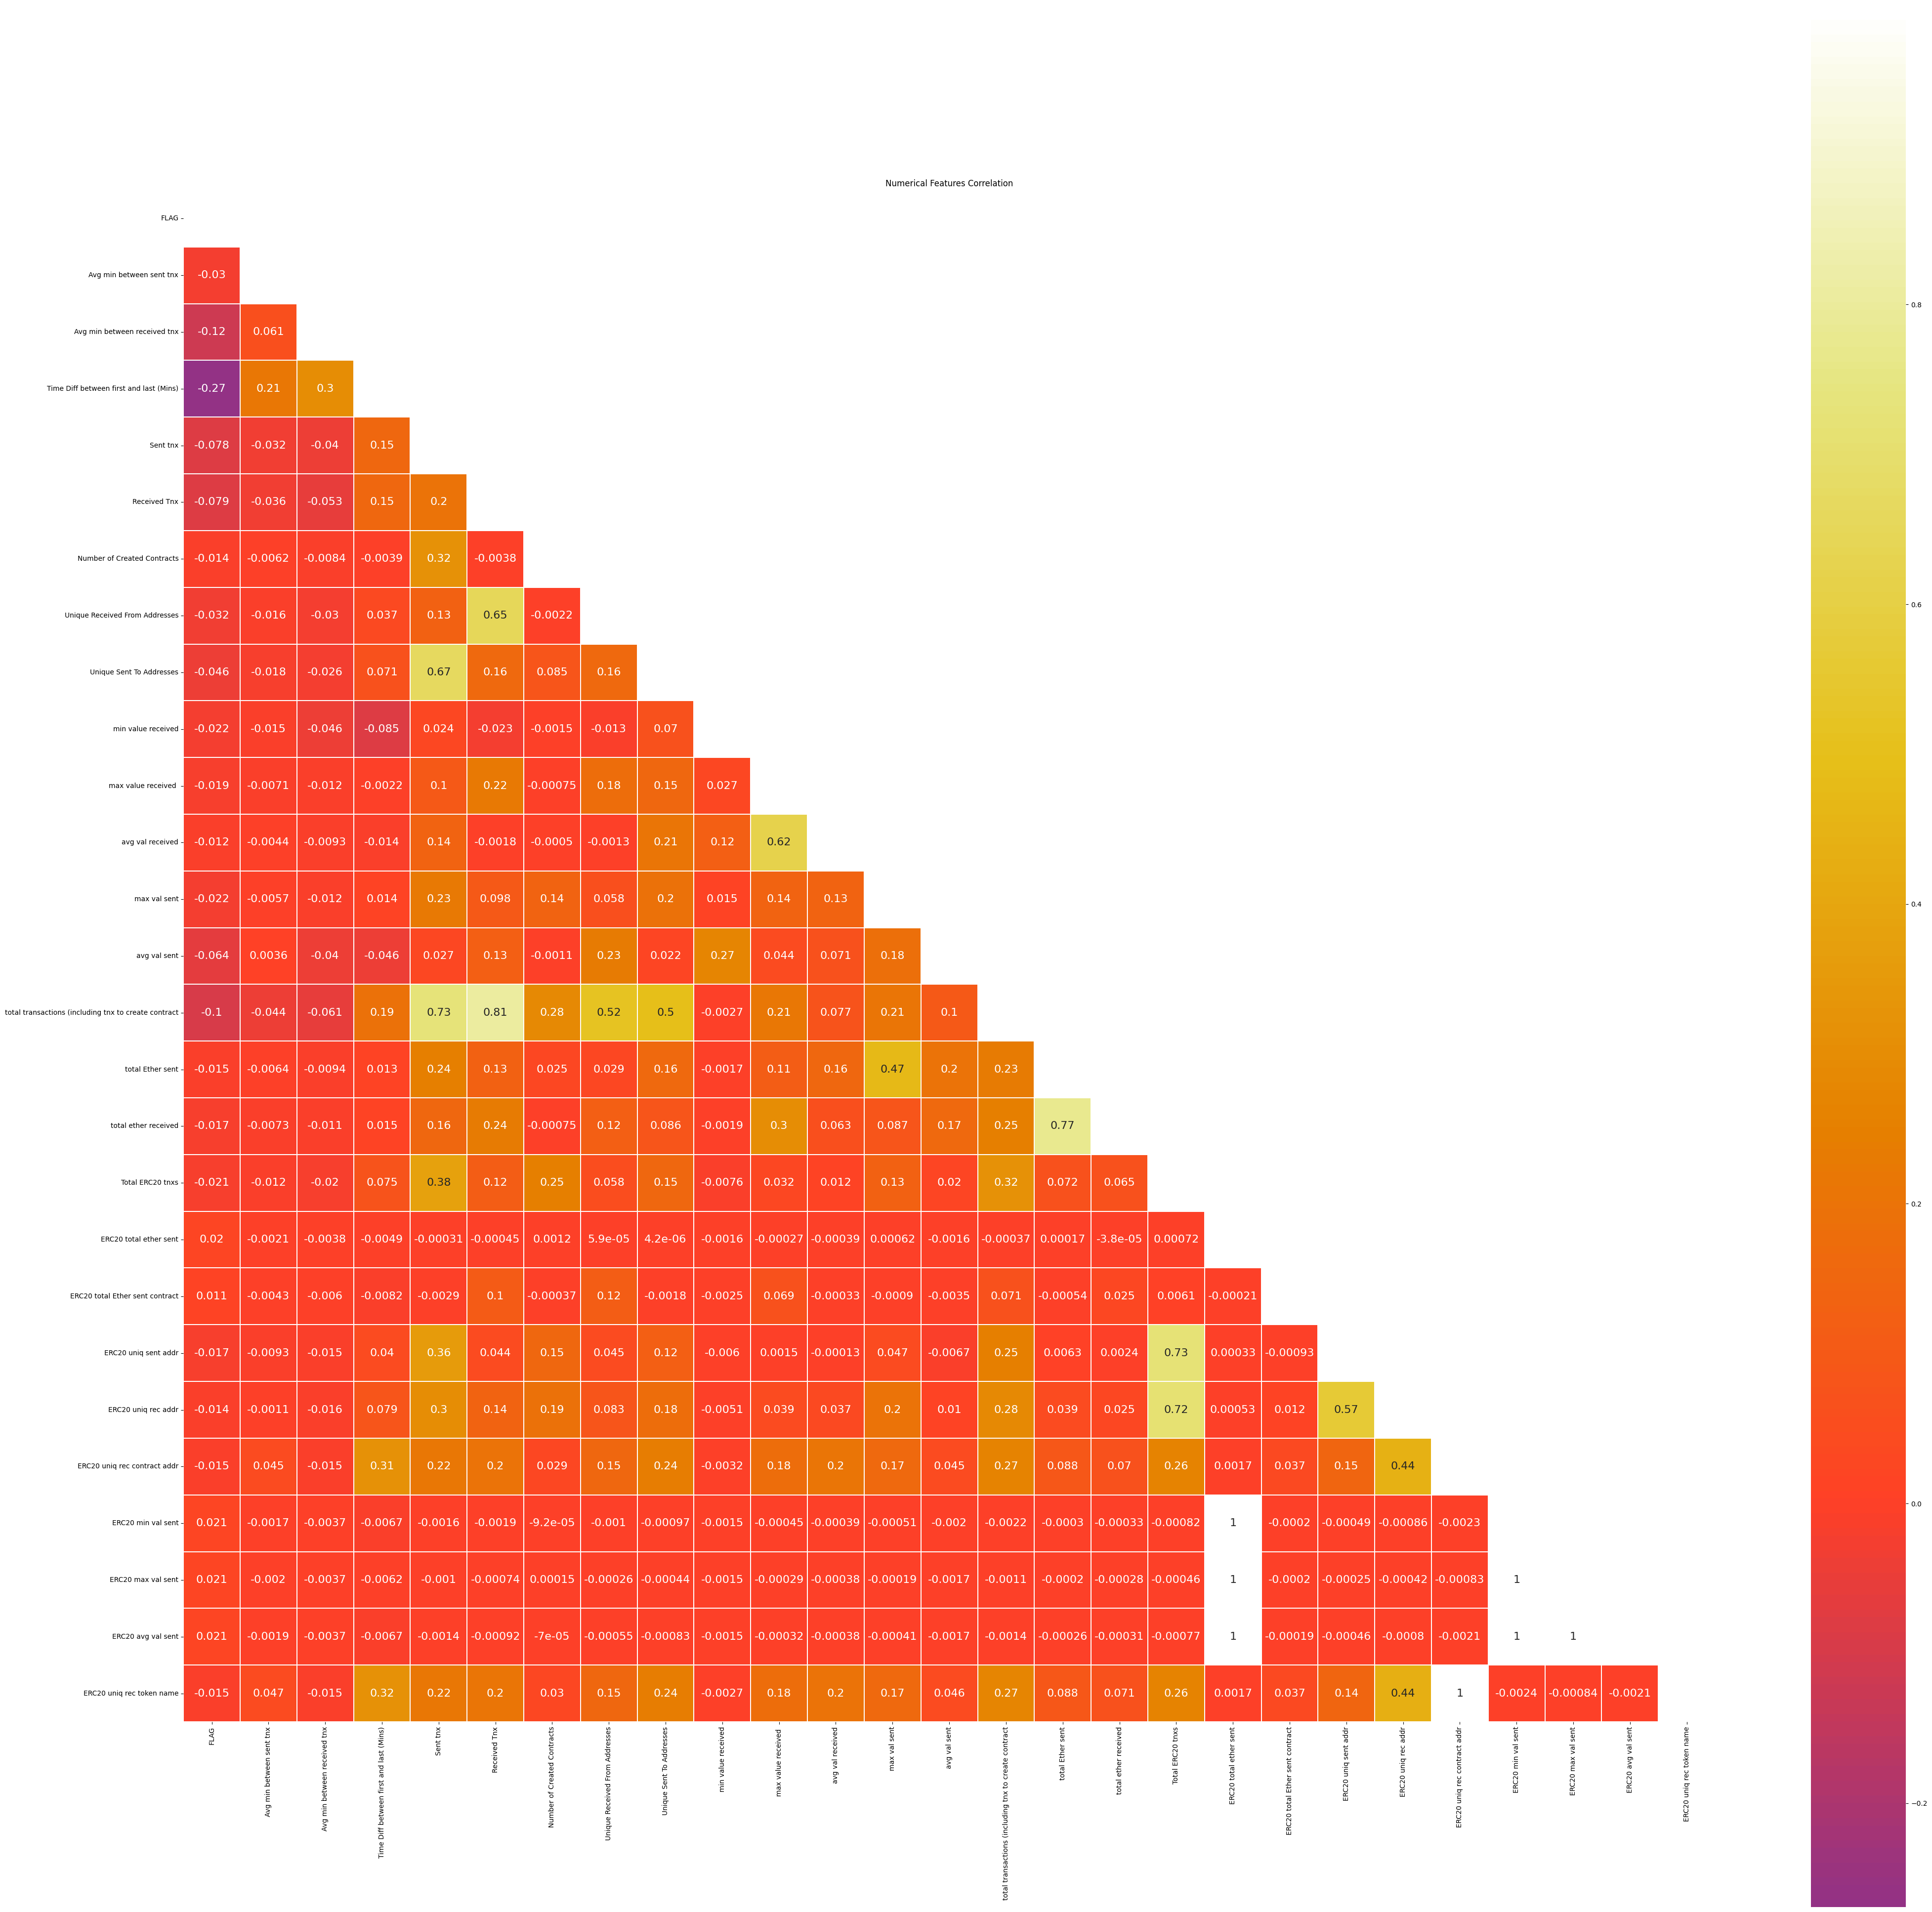

In [60]:
corr = df_cleaned.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(50, 50))
sns.heatmap(corr, mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True, annot_kws={"size": 16})
plt.title('Numerical Features Correlation')
plt.show()

In [61]:
corr["FLAG"].sort_values(ascending = False)

FLAG                                                    1.000000
ERC20 min val sent                                      0.020863
ERC20 avg val sent                                      0.020599
ERC20 max val sent                                      0.020594
ERC20 total ether sent                                  0.020367
ERC20 total Ether sent contract                         0.011115
avg val received                                       -0.011881
Number of Created Contracts                            -0.013711
ERC20 uniq rec addr                                    -0.014426
ERC20 uniq rec token name                              -0.014844
total Ether sent                                       -0.014993
ERC20 uniq rec contract addr                           -0.015239
total ether received                                   -0.016900
ERC20 uniq sent addr                                   -0.016906
max value received                                     -0.019259
Total ERC20 tnxs         

In [62]:
print(df_cleaned.columns)

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'max val sent', 'avg val sent',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received', 'Total ERC20 tnxs',
       'ERC20 total ether sent', 'ERC20 total Ether sent contract',
       'ERC20 uniq sent addr', 'ERC20 uniq rec addr',
       'ERC20 uniq rec contract addr', 'ERC20 min val sent',
       'ERC20 max val sent', 'ERC20 avg val sent',
       'ERC20 uniq rec token name'],
      dtype='object')


In [63]:
X, y = df_cleaned.drop(['FLAG'], axis = 1), df_cleaned[['FLAG']]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

XGBOOST

In [65]:
xgb_c = xgb.XGBClassifier(random_state=42)
xgb_c.fit(X_train, y_train)
pred = xgb_c.predict(X_test)

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2334
           1       0.97      0.96      0.96       619

    accuracy                           0.98      2953
   macro avg       0.98      0.97      0.98      2953
weighted avg       0.98      0.98      0.98      2953

[[2315   19]
 [  27  592]]


XGBClassifier oznaczył 19 transakcji jako oszustwa, podczas gdy nie były one oszustwami.
27 oznaczył jako transakcje nie będące oszustwem, poczas gdy były one oszustwem

Zastosowanie SMOTE  w celu poradzenia sobie z niezbilansowanymi danymi

In [66]:
oversample = SMOTE()

In [67]:
#rozmiar danych testowych
print(X_train.shape, y_train.shape)

(6888, 26) (6888, 1)


In [68]:
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [69]:
#rozmiar danych po SMOTE
print(X_train_smote.shape, y_train_smote.shape)

(10656, 26) (10656, 1)


In [70]:
xgb_smote = xgb.XGBClassifier(random_state=42)
xgb_smote.fit(X_train_smote, y_train_smote)
pred2 = xgb_smote.predict(X_test)

print(classification_report(y_test, pred2))
print(confusion_matrix(y_test, pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2334
           1       0.95      0.96      0.96       619

    accuracy                           0.98      2953
   macro avg       0.97      0.98      0.97      2953
weighted avg       0.98      0.98      0.98      2953

[[2301   33]
 [  22  597]]


Po zastosowaniu SMOTE XGB Classifier:
oznaczył 33 przypadków jako oszustwa, podczas gdy nie były one oszustwami.
22 oznaczył jako transakcje nie będące oszustwem, poczas gdy były one oszustwem

WNIOSEK: po zastosowaniu SMOTE klasyfikator oznaczył mniej transakcji, które były oszustwem jako transakcje poprawne

oraz oznaczył więcej transakcji będących transakcjami poprawnymi jako oszustwa - W przypadku analizy FRAUDów może być to zaletą ponieważ minimalizuje to straty oraz ryzyko przepuszczenia transakcji będącej oszustwem

**DODANIE HYPERPARAMETRÓW**

In [71]:
xgb_smote = xgb.XGBClassifier(
    random_state=42,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    max_depth=3,
    colsample_bytree=0.8
)

xgb_smote.fit(X_train_smote, y_train_smote)
pred3 = xgb_smote.predict(X_test)
print(classification_report(y_test, pred3))
print(confusion_matrix(y_test, pred3))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2334
           1       0.90      0.97      0.93       619

    accuracy                           0.97      2953
   macro avg       0.95      0.97      0.96      2953
weighted avg       0.97      0.97      0.97      2953

[[2270   64]
 [  20  599]]


XGB z użyciem GridSearch oznaczył 64 transakcji jako oszustwa, podczas gdy nie były one oszustwami. 20 oznaczył jako transakcje nie będące oszustwem, poczas gdy były one oszustwem

Dostrojenie parametrów za pomocą **GridSearchCV**

In [72]:
param = {'learning_rate':[0.01, 0.1, 0.5],
              'n_estimators':[100,200],
              'subsample':[0.5, 0.9],
               'max_depth':[3,4],
               'colsample_bytree':[0.3,0.7]}

grid = GridSearchCV(estimator=xgb_smote, param_grid=param, scoring='recall', cv = 10, verbose = 0)

grid.fit(X_train_smote, y_train_smote)
print(f'Best params found for XGBoost are: {grid.best_params_}')
print(f'Best recall obtained by the best params: {grid.best_score_}')

Best params found for XGBoost are: {'colsample_bytree': 0.7, 'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.9}
Best recall obtained by the best params: 0.9898686679174483


In [73]:
xgb_gs = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, xgb_gs))
print(confusion_matrix(y_test, xgb_gs))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2334
           1       0.95      0.96      0.96       619

    accuracy                           0.98      2953
   macro avg       0.97      0.97      0.97      2953
weighted avg       0.98      0.98      0.98      2953

[[2306   28]
 [  25  594]]


XGB z użyciem GridSearch oznaczył 28 transakcji jako oszustwa, podczas gdy nie były one oszustwami. 25 oznaczył jako transakcje nie będące oszustwem, poczas gdy były one oszustwem

**Wnioski:**

Po dodaniu parametrów do modelu, bez użycia GirdSearch'a, otrzymałam największą liczbę transakcji oznaczonych jako oszustwa, pomimo że nie były one oszustwem (64) oraz najmniejszą liczbę oszukanych transakcji, ale oznaczonych jako transakcje nie będące oszustwami (20).


Ze względu na ostrożność podaczas wykrywania transakcji, które są FRAUDami kluczowa jest jak najmniejsza liczba transakcji oszukanych transakcji, ale oznaczonych jako poprawne. W związku z czym wybrałabym ten model, aczkolwiek wszystkie modele dobrze poradziły sobie z wykrywaniem FRAUDów.
